In [ ]:
# !nvidia-smi

### **CAPSTONE PROJECT - Website Behaviour Analysis**

**Problem:** The client is an online ecommerce player. They have shared a user-level log data for their browning behaviour (Timestamp, UserID and website section visited). You have been provided with the final conversion data too (Timestamp, UserID, Products purchased in the transaction, Overall cart value)

**Task:** Based on this data you are required to build features and model on these characterstics of users to calculate a score/rank for conversion probability of that user.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
print("Libraries import successful")

Libraries import successful


### **Reading Site Browsing Behaviour Data**

In [ ]:
# Loading Browsing behaviour data

import pandas as pd

site_browsing = pd.read_csv('/content/drive/MyDrive/Projects/Supervised_Model/Problem2_Site_BrowsingBehavior', delimiter ='\t', header = None)

site_browsing.columns = ['Timestamp', 'UserID', 'Website_Section_Visited']


In [ ]:
site_browsing.head()

,Timestamp,UserID,Website_Section_Visited
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content


In [ ]:
print('Shape of site browsing dataset:', site_browsing.shape)

Shape of site browsing dataset: (5535924, 3)


In [ ]:
# Checking null values in the dataset

site_browsing.isnull().sum()

Timestamp                  0
UserID                     0
Website_Section_Visited    0
dtype: int64

In [ ]:
# checking the summary of dataset

site_browsing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5535924 entries, 0 to 5535923
Data columns (total 3 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Timestamp                object
 1   UserID                   int64 
 2   Website_Section_Visited  object
dtypes: int64(1), object(2)
memory usage: 126.7+ MB


In [ ]:
# checking the number of unique 'UserID' in the dataset

site_browsing['UserID'].nunique()

516932

In [ ]:
# Number of times the website section visited

site_browsing['Website_Section_Visited'].value_counts()

product                     1855680
product-listing-category     823365
home                         752124
default                      552025
content                      488874
iroa                         428497
cart                         323325
product-listing-search       262481
shoplive                      35810
productNotFound                9333
product-listing-custom         2970
signupcomplete                 1312
mys                              63
error                            60
lorigreiner                       3
wishlist                          1
category                          1
Name: Website_Section_Visited, dtype: int64

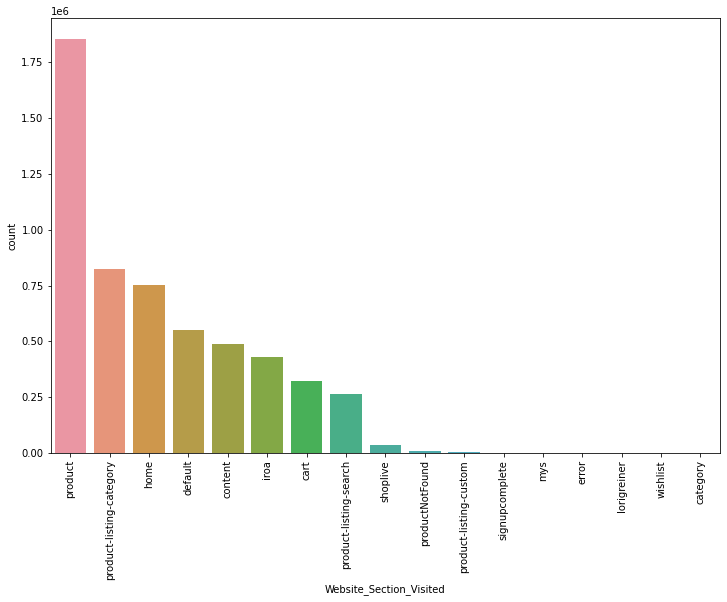

In [ ]:
# Let us plot the number of times each wesbite section visited

plt.figure(figsize= (12,8))
sns.countplot(site_browsing['Website_Section_Visited'], order = site_browsing['Website_Section_Visited'].value_counts().index)
plt.xticks(rotation=90);

### **Reading Final_Conversion Dataset**

In [ ]:
# Loading final conversion data

final_conversion = pd.read_csv('/content/drive/MyDrive/Projects/Supervised_Model/Problem2_FInalConversions', sep='\t', header = None)
final_conversion.columns = ['Timestamp', 'UserID', 'Products_Purchased', 'Cart_Value']
final_conversion.head()

,Timestamp,UserID,Products_Purchased,Cart_Value
0,2017-07-26 00:00:10.465,0,A293532,52.14
1,2017-07-26 00:00:12.301,0,H209597,31.50
2,2017-07-26 00:00:12.388,0,H211370,30.48
3,2017-07-26 00:00:14.389,0,A282331,51.00
4,2017-07-26 00:00:16.837,0,H211410,16.74


In [ ]:
print('Shape of final conversion dataset:',final_conversion.shape)

Shape of final conversion dataset: (79795, 4)


In [ ]:
# Checking null values in the conversion dataset

final_conversion.isnull().sum()

Timestamp             0
UserID                0
Products_Purchased    0
Cart_Value            0
dtype: int64

In [ ]:
# checking the summary of conversion dataset

final_conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79795 entries, 0 to 79794
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           79795 non-null  object 
 1   UserID              79795 non-null  int64  
 2   Products_Purchased  79795 non-null  object 
 3   Cart_Value          79795 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [ ]:
# checking the number of unique 'UserID' in the final conversion dataset

final_conversion['UserID'].nunique()

41009

In [ ]:
# Figuring out the top 25 products which were most purchased

products = final_conversion['Products_Purchased'].value_counts()
products_top25 = pd.DataFrame(products[:25]).reset_index()
products_top25.columns = ['Product_Cat', 'Products_Purchased']
products_top25

,Product_Cat,Products_Purchased
0,K45766,6194
1,H211394,5168
2,H211370,4920
3,A293532,4798
4,H211397,1434
5,A302728,1341
6,A299297,1334
7,H205246,1193
8,H211939,1134
9,K41372,924


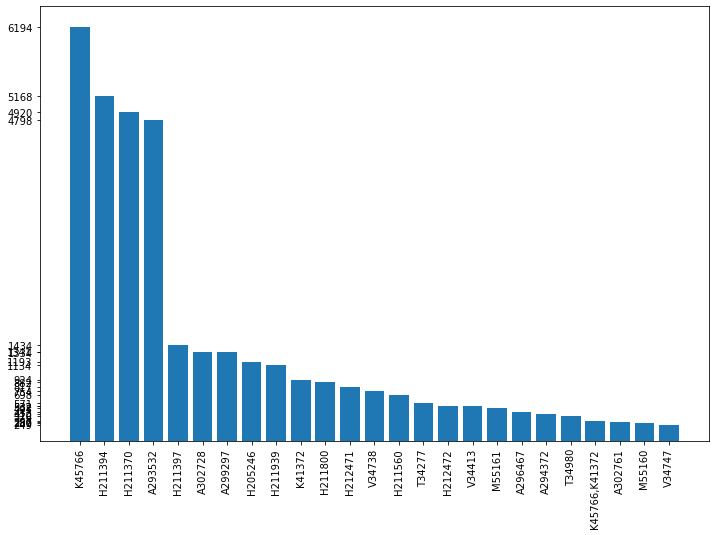

In [ ]:
# Ploting number of times products were purchased

plt.figure(figsize= (12,8))
plt.bar(products_top25['Product_Cat'], products_top25.Products_Purchased)
plt.xticks(products_top25.Product_Cat.index.values, rotation=90)
plt.yticks(products_top25.Products_Purchased);

### **Merging Two Datasets, Generating New Features and doing EDA**


In [ ]:
# Merging two dataframes

df_final = pd.merge(final_conversion,site_browsing, on=['UserID'], how='inner', left_index = True, right_index = True)


In [ ]:
df_final.head()

,Timestamp_x,UserID,Products_Purchased,Cart_Value,Timestamp_y,Website_Section_Visited
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,product
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,product
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,default
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,product-listing-category
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,content


In [ ]:
df_final['Date_time_x'] = pd.to_datetime(df_final['Timestamp_x'])
df_final['Date_time_y'] = pd.to_datetime(df_final['Timestamp_y'])

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79795 entries, 0 to 79794
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp_x              79795 non-null  object        
 1   UserID                   79795 non-null  int64         
 2   Products_Purchased       79795 non-null  object        
 3   Cart_Value               79795 non-null  float64       
 4   Timestamp_y              79795 non-null  object        
 5   Website_Section_Visited  79795 non-null  object        
 6   Date_time_x              79795 non-null  datetime64[ns]
 7   Date_time_y              79795 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 5.5+ MB


In [ ]:
# Time conversion

import datetime
from datetime import timedelta

def Time_conversion(df_final):
  time_delta = df_final['Date_time_y'] - df_final['Date_time_x']

  total_seconds = time_delta.total_seconds()

  minutes = total_seconds/60

  return abs(minutes)


In [ ]:
df_final['Time_spent_Minutes'] = df_final.apply(Time_conversion, axis = 1)

df_final.drop(['Timestamp_x', 'Timestamp_y', 'Date_time_x', 'Date_time_y'], axis=1, inplace=True)

df_final.head()

,UserID,Products_Purchased,Cart_Value,Website_Section_Visited,Time_spent_Minutes
0,0,A293532,52.14,product,1.508333
1,0,H209597,31.50,product,3.102450
2,0,H211370,30.48,default,36.777333
3,0,A282331,51.00,product-listing-category,41.048067
4,0,H211410,16.74,content,45.372667


**Creating engineered features for further analysis.**

In [ ]:
# Creating a new feature to figure out an account/UserID visited the website number of times

Login_count = site_browsing.groupby('UserID').Website_Section_Visited.agg(['count']).reindex(site_browsing.UserID).reset_index()

Login_count.columns = ['UserID', 'No_of_times_visited']

Login_count = Login_count.sort_values(by = 'No_of_times_visited', ascending = False)

Login_count.drop_duplicates(inplace=True)

Login_count.head() 

,UserID,No_of_times_visited
0,0,1407879
3606718,3077341700699443780,3106
814545,7190685980615725949,821
3134306,1215902060999829238,723
4931477,7188604889406730572,550


In [ ]:
# Another new feature to know total money spent by each UserID

individual_purchase = df_final.groupby('UserID')['Cart_Value'].agg(['sum']).reindex(df_final['UserID']).reset_index()

individual_purchase.drop_duplicates(inplace=True)

individual_purchase.columns = ['UserID', 'Total_cart_value']

individual_purchase.head()

,UserID,Total_cart_value
0,0,1375101.66
548,5942997097932061,157.95
549,23951842225160889,60.96
551,30833658052409950,216.12
552,33873861847792934,53.24


In [ ]:
# Creating this new feature to know total transaction by Each UserID

df_cart_Products = df_final.groupby('UserID')['Products_Purchased'].agg(['count']).reindex(df_final['UserID']).reset_index()
df_cart_Products.drop_duplicates(inplace=True)

df_cart_Products.columns = ['UserID', 'Total_Products_Purchased']

df_cart_Products.head()

,UserID,Total_Products_Purchased
0,0,20197
548,5942997097932061,1
549,23951842225160889,2
551,30833658052409950,5
552,33873861847792934,1


In [ ]:
# Creating this new feature to know total time spent by each UserID in minutes

individual_time_spent = df_final.groupby('UserID')['Time_spent_Minutes'].agg(['sum']).reindex(df_final['UserID']).reset_index()
individual_time_spent.drop_duplicates(inplace=True)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

individual_time_spent.columns = ['UserID', 'Total_Time_Spent']

individual_time_spent.head()

,UserID,Total_Time_Spent
0,0,11780947.272
548,5942997097932061,0.450
549,23951842225160889,52.050
551,30833658052409950,381.190
552,33873861847792934,10.063


In [ ]:
df_final.head()

,UserID,Products_Purchased,Cart_Value,Website_Section_Visited,Time_spent_Minutes
0,0,A293532,52.140,product,1.508
1,0,H209597,31.500,product,3.102
2,0,H211370,30.480,default,36.777
3,0,A282331,51.000,product-listing-category,41.048
4,0,H211410,16.740,content,45.373


In [ ]:
# merging 4 engineered datasets with final dataset

df_final.drop_duplicates(subset='UserID', keep='first', inplace=True)

df_final = pd.merge(df_final, individual_purchase, on=['UserID'], how='inner', left_index=True, right_index=True)

df_final = pd.merge(df_final, df_cart_Products, on=['UserID'], how='inner', left_index=True, right_index=True)

df_final = pd.merge(df_final, individual_time_spent, on=['UserID'], how='inner', left_index=True, right_index=True)

df_final = pd.merge(df_final, Login_count, on=['UserID'], how='inner')

df_final.head()

,UserID,Products_Purchased,Cart_Value,Website_Section_Visited,Time_spent_Minutes,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited
0,0,A293532,52.140,product,1.508,1375101.660,20197,11780947.272,1407879
1,23951842225160889,H211370,33.480,product-listing-search,26.025,60.960,2,52.050,8
2,30833658052409950,H211394,44.680,content,54.915,216.120,5,381.190,13
3,33873861847792934,H211800,53.240,product,10.063,53.240,1,10.063,5
4,42949238806579040,A286591,30.000,default,14.424,52.480,2,1424.197,20


In [ ]:
# Dropping unncessary features for further analysis.

df_final.drop(['Products_Purchased', 'Cart_Value', 'Website_Section_Visited', 'Time_spent_Minutes'], axis = 1, inplace=True)

In [ ]:
df_final.head()

,UserID,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited
0,0,1375101.660,20197,11780947.272,1407879
1,23951842225160889,60.960,2,52.050,8
2,30833658052409950,216.120,5,381.190,13
3,33873861847792934,53.240,1,10.063,5
4,42949238806579040,52.480,2,1424.197,20


In [ ]:
# Creating bying probability feature

df_final['Buy_Probability'] = (df_final['Total_Products_Purchased']/df_final['No_of_times_visited'])
df_final.head()

,UserID,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited,Buy_Probability
0,0,1375101.660,20197,11780947.272,1407879,0.014
1,23951842225160889,60.960,2,52.050,8,0.250
2,30833658052409950,216.120,5,381.190,13,0.385
3,33873861847792934,53.240,1,10.063,5,0.200
4,42949238806579040,52.480,2,1424.197,20,0.100


In [ ]:
#Creating User score rank for dependent variable

df_final['User_Score_Rank'] = (df_final['Buy_Probability']*df_final['Total_cart_value'])

df_final.head()

,UserID,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited,Buy_Probability,User_Score_Rank
0,0,1375101.660,20197,11780947.272,1407879,0.014,19726.786
1,23951842225160889,60.960,2,52.050,8,0.250,15.240
2,30833658052409950,216.120,5,381.190,13,0.385,83.123
3,33873861847792934,53.240,1,10.063,5,0.200,10.648
4,42949238806579040,52.480,2,1424.197,20,0.100,5.248


In [ ]:
# Dropping first (0th) row since we do not know about each individual user behaviour of this entry.

df_final.drop(df_final.index[0], inplace=True)
df_final.head()

,UserID,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited,Buy_Probability,User_Score_Rank
1,23951842225160889,60.960,2,52.050,8,0.250,15.240
2,30833658052409950,216.120,5,381.190,13,0.385,83.123
3,33873861847792934,53.240,1,10.063,5,0.200,10.648
4,42949238806579040,52.480,2,1424.197,20,0.100,5.248
5,53342625381053594,111.980,2,80.579,18,0.111,12.442


**Below custosers are highest spending customers. Send bonus and target highest spending customers:**

In [ ]:
# Highest spending customers

cust_rank = df_final[['UserID','Total_cart_value']].sort_values(by = 'Total_cart_value', ascending = False)[:100]

cust_rank

,UserID,Total_cart_value
5652,8169571183847115777,7765.700
15557,4098021178710872531,7381.110
16605,6992616518447940056,6792.260
1956,7302608914432039755,6068.640
30870,5723377859179335428,5596.360
...,...,...
22973,6021566630445258098,1539.860
19869,1296185601822506462,1538.640
22064,3449482812150912222,1528.940
22964,5898226586715380735,1522.180


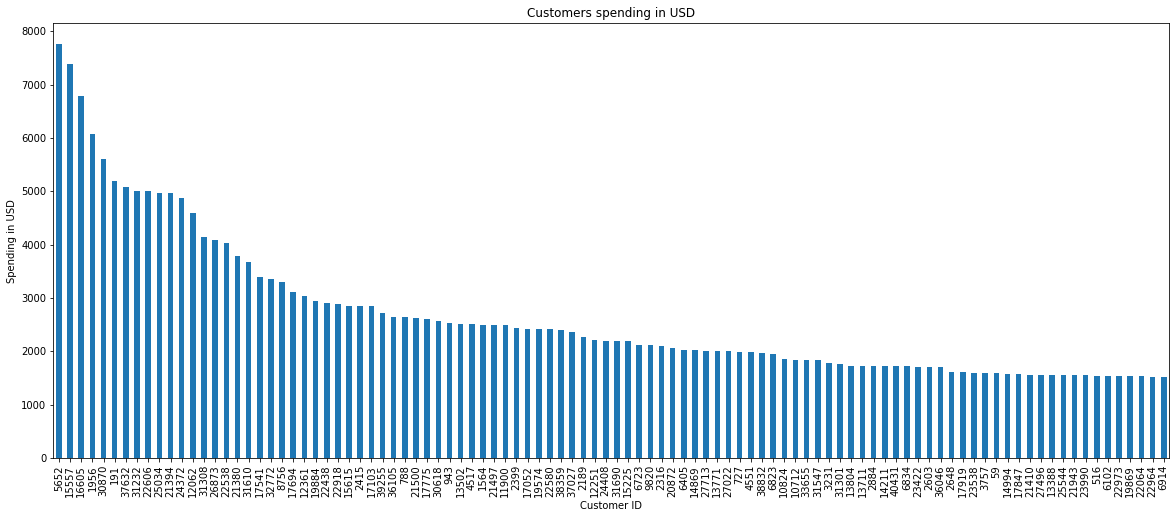

In [ ]:
# Plotting graph of highest spending customers in descending order

plt.figure(figsize= (20,8))
cust_rank['Total_cart_value'].plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Customer ID')
plt.ylabel('Spending in USD')
plt.title('Customers spending in USD');

## **Feature Engineering**

#### Here in this section I'm going to perform below tasks

- Droping unwanted features - Apart from other features, I'm dropping User ID since this feature has no role in ML model
- Handling missing values : No missing values found as per EDA
- Removing outliers from dependant variable
- Performing feature scaling

In [ ]:
df_final1 = df_final.drop('UserID', axis=1)

In [ ]:
df_final1.head()

,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited,Buy_Probability,User_Score_Rank
1,60.960,2,52.050,8,0.250,15.240
2,216.120,5,381.190,13,0.385,83.123
3,53.240,1,10.063,5,0.200,10.648
4,52.480,2,1424.197,20,0.100,5.248
5,111.980,2,80.579,18,0.111,12.442


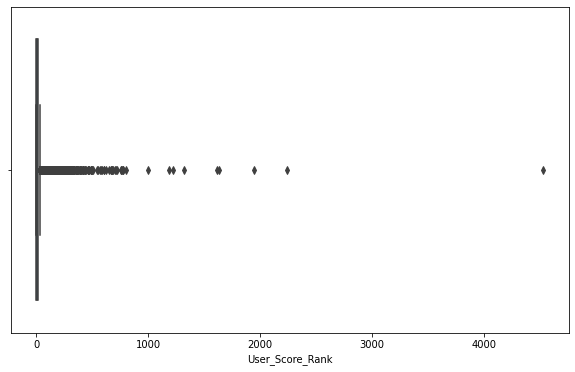

In [ ]:
# Checking outliers in dependant variable, i.e. User_Score_Rank

plt.figure(figsize=(10,6), facecolor='white')
sns.boxplot(x=df_final1['User_Score_Rank'])
plt.xlabel('User_Score_Rank')
plt.show()

**Above box plot shows that there are outliers in User_Score_Rank. I shall use IQR method to remove outliers.**

In [ ]:
first, third = df_final1.User_Score_Rank.quantile([0.25, 0.75])
first, third

(2.992727272727273, 15.334285714285715)

In [ ]:
iqr = third - first
iqr

12.34155844155844

In [ ]:
lower = first - 1.5*iqr
lower

-15.519610389610389

In [ ]:
upper = third + 1.5*iqr
upper

33.84662337662338

In [ ]:
df_final2 = df_final1[(df_final1['User_Score_Rank'] > lower) & (df_final1['User_Score_Rank'] < upper)]
df_final2.head()

,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited,Buy_Probability,User_Score_Rank
1,60.960,2,52.050,8,0.250,15.240
3,53.240,1,10.063,5,0.200,10.648
4,52.480,2,1424.197,20,0.100,5.248
5,111.980,2,80.579,18,0.111,12.442
6,91.440,3,35.379,15,0.200,18.288


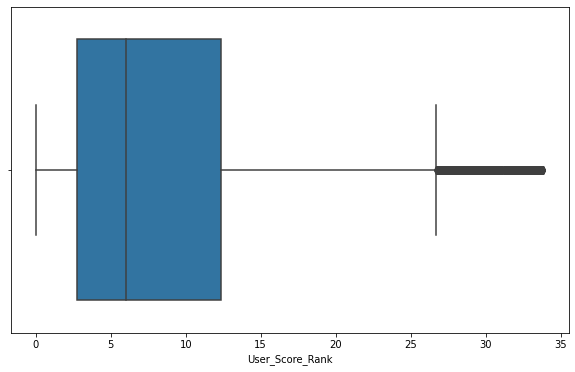

In [ ]:
# Checking outliers in dependant variable, i.e. User_Score_Rank
# Now I have removed a considerable amount of outliers

plt.figure(figsize=(10,6), facecolor='white')
sns.boxplot(x=df_final2['User_Score_Rank'])
plt.xlabel('User_Score_Rank')
plt.show()

In [ ]:
# Here, I'm splitting the train and test features
# and applying feature scaling for all numerical features

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_final2.drop(['User_Score_Rank'], axis=1)
y = df_final2['User_Score_Rank']

sc = StandardScaler()
X = sc.fit_transform(X)  ##Standardizing all features of X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(29888, 5) (7472, 5)
(29888,) (7472,)


In [ ]:
## DO NOT RUN THIS CODE IN JUPYTER - DATASET IS TOO BIG!!
# Run this code-block in Colab

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

xgb_regressor = XGBRegressor(Learning_rate=0.02, n_estimators=1000, seed=42)

xgb_regressor.fit(X_train, y_train)
pred=xgb_regressor.predict(X_test)

print('RMSE: ', sqrt(mean_squared_error(y_test, pred)))
print('MSE: ', mean_squared_error(y_test, pred))
print('R2: ', r2_score(y_test, pred))

[06:38:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE:  0.2043471969057266
MSE:  0.04175777688322781
R2:  0.9992822538519497


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

regressor_rf = RandomForestRegressor()

regressor_rf.fit(X_train, y_train)
pred=regressor_rf.predict(X_test)

print('RMSE: ', sqrt(mean_squared_error(y_test, pred)))
print('MSE: ', mean_squared_error(y_test, pred))
print('R2: ', r2_score(y_test, pred))

RMSE:  0.12494181562167278
MSE:  0.015610457290840075
R2:  0.9997316824211898


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [200, 300, 400, 500, 600]
max_features = ['auto', 'sqrt']
max_depth = [20, 40, 50, 60, 80]
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 3, 4, 5]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_cv2 = RandomizedSearchCV(estimator=RandomForestRegressor(), 
                                param_distributions = random_grid, n_iter = 50,
                                scoring = 'neg_mean_absolute_error', cv = 5,
                                verbose = 5, random_state=42, n_jobs=-1, return_train_score = True)

random_cv2.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 71.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
random_cv2.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 600}

In [ ]:
ffclassifier = RandomForestRegressor(**random_cv2.best_params_)
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

print('RMSE: ', sqrt(mean_squared_error(y_test, pred)))
print('MSE: ', mean_squared_error(y_test, pred))
print('R2: ', r2_score(y_test, pred))

RMSE:  0.13284317368806747
MSE:  0.01764730879551806
R2:  0.9996966723600527


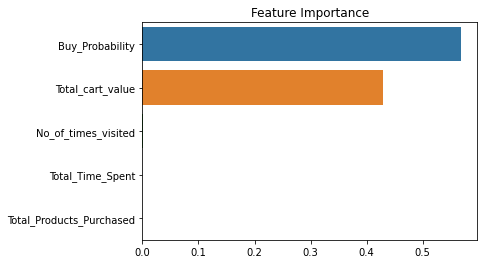

In [ ]:
imp = pd.Series(data=classifier.feature_importances_, index=['Total_cart_value', 'Total_Products_Purchased',	'Total_Time_Spent',
                                                             'No_of_times_visited',	'Buy_Probability']).sort_values(ascending=False)

plt.title('Feature Importance')
ax = sns.barplot(y=imp.index, x=imp.values, orient='h')

**NOTE:** Seems the most important features are `Total_Cart_Value` and `Buy_probability`

Hence users with higher `Total_Cart_Value` and `Buy_probability` should be targeted